### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-12/12/19
#### Clasificacion de alfa de los canales C3 y C4 de MI-EEG con LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 2, 255))
x_test = x_test.reshape((n_samples_test, 2, 255))

print(x_train.shape)
print(x_test.shape)

(288, 2, 255)
(288, 2, 255)


In [11]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 255, 2)
(288, 255, 2)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 288 samples, validate on 288 samples
Epoch 1/100
288/288 - 7s - loss: 1.3823 - acc: 0.2535 - val_loss: 1.3901 - val_acc: 0.2222
Epoch 2/100
288/288 - 6s - loss: 1.3881 - acc: 0.2778 - val_loss: 1.3904 - val_acc: 0.2257
Epoch 3/100
288/288 - 6s - loss: 1.3832 - acc: 0.2847 - val_loss: 1.3908 - val_acc: 0.2188
Epoch 4/100
288/288 - 6s - loss: 1.3840 - acc: 0.2917 - val_loss: 1.3910 - val_acc: 0.2118
Epoch 5/100
288/288 - 6s - loss: 1.3787 - acc: 0.3090 - val_loss: 1.3913 - val_acc: 0.2153
Epoch 6/100
288/288 - 6s - loss: 1.3821 - acc: 0.2569 - val_loss: 1.3919 - val_acc: 0.2153
Epoch 7/100
288/288 - 6s - loss: 1.3855 - acc: 0.2743 - val_loss: 1.3923 - val_acc: 0.2257
Epoch 8/100
288/288 - 6s - loss: 1.3804 - acc: 0.2882 - val_loss: 1.3928 - val_acc: 0.2292
Epoch 9/100
288/288 - 6s - loss: 1.381

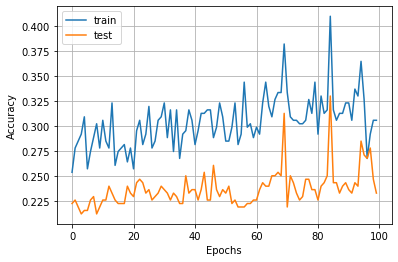

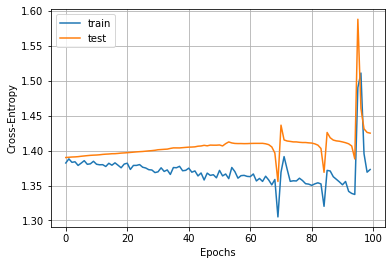

Iteration: 2
Train on 288 samples, validate on 288 samples
Epoch 1/100
288/288 - 6s - loss: 1.3869 - acc: 0.2604 - val_loss: 1.3891 - val_acc: 0.2639
Epoch 2/100
288/288 - 6s - loss: 1.3811 - acc: 0.2535 - val_loss: 1.3892 - val_acc: 0.2812
Epoch 3/100
288/288 - 6s - loss: 1.3804 - acc: 0.2708 - val_loss: 1.3897 - val_acc: 0.2604
Epoch 4/100
288/288 - 6s - loss: 1.3825 - acc: 0.2292 - val_loss: 1.3900 - val_acc: 0.2812
Epoch 5/100
288/288 - 6s - loss: 1.3820 - acc: 0.2500 - val_loss: 1.3903 - val_acc: 0.3021
Epoch 6/100
288/288 - 6s - loss: 1.3779 - acc: 0.2951 - val_loss: 1.3907 - val_acc: 0.2882
Epoch 7/100
288/288 - 6s - loss: 1.3804 - acc: 0.3090 - val_loss: 1.3911 - val_acc: 0.2778
Epoch 8/100
288/288 - 6s - loss: 1.3848 - acc: 0.2674 - val_loss: 1.3913 - val_acc: 0.2535
Epoch 9/100
288/288 - 6s - loss: 1.3768 - acc: 0.2847 - val_loss: 1.3918 - val_acc: 0.2396
Epoch 10/100
288/288 - 6s - loss: 1.3781 - acc: 0.2812 - val_loss: 1.3922 - val_acc: 0.2396
Epoch 11/100
288/288 - 6s - lo

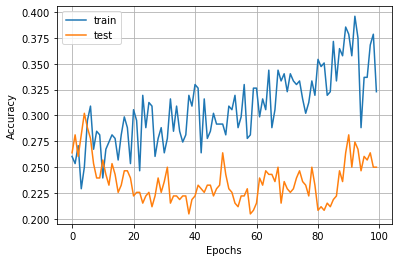

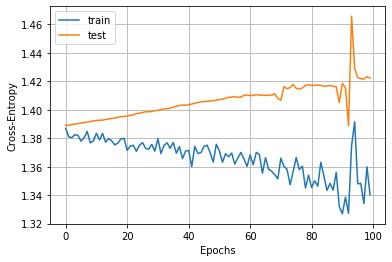

Iteration: 3
Train on 288 samples, validate on 288 samples
Epoch 1/100
288/288 - 6s - loss: 1.3884 - acc: 0.2118 - val_loss: 1.3851 - val_acc: 0.2535
Epoch 2/100
288/288 - 6s - loss: 1.3941 - acc: 0.2188 - val_loss: 1.3854 - val_acc: 0.2778
Epoch 3/100
288/288 - 6s - loss: 1.3890 - acc: 0.2188 - val_loss: 1.3858 - val_acc: 0.2778
Epoch 4/100
288/288 - 6s - loss: 1.3882 - acc: 0.2465 - val_loss: 1.3860 - val_acc: 0.2778
Epoch 5/100
288/288 - 6s - loss: 1.3903 - acc: 0.2222 - val_loss: 1.3865 - val_acc: 0.2812
Epoch 6/100
288/288 - 6s - loss: 1.3900 - acc: 0.2431 - val_loss: 1.3869 - val_acc: 0.2569
Epoch 7/100
288/288 - 6s - loss: 1.3891 - acc: 0.2292 - val_loss: 1.3873 - val_acc: 0.2604
Epoch 8/100
288/288 - 6s - loss: 1.3897 - acc: 0.2326 - val_loss: 1.3877 - val_acc: 0.2465
Epoch 9/100
288/288 - 6s - loss: 1.3892 - acc: 0.2222 - val_loss: 1.3880 - val_acc: 0.2396
Epoch 10/100
288/288 - 6s - loss: 1.3891 - acc: 0.2257 - val_loss: 1.3882 - val_acc: 0.2326
Epoch 11/100
288/288 - 6s - lo

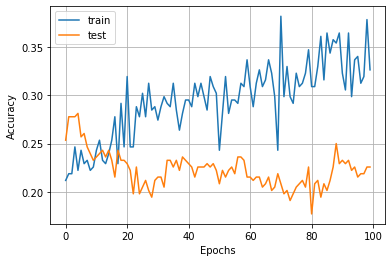

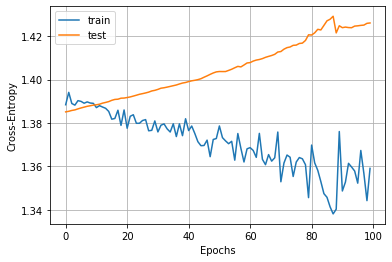


Resultados:
loss: [1.4249549839231703, 1.4223484595616658, 1.4261519246631198]
accuracy: [0.2326389, 0.25, 0.22569445]
kappa: [-0.02314814814814814, 0.0, -0.03240740740740744]
precision: [0.2231638616175783, 0.2569730142404561, 0.25106405939739274]
recall: [0.2326388888888889, 0.25, 0.22569444444444445]
f1: [0.21757583630467112, 0.24791703673517726, 0.2171175705076544]


In [12]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(3): #cambiar a 10
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(LSTM(16, input_shape=(255,2)))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 16)                1216      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 1,284
Trainable params: 1,284
Non-trainable params: 0
_________________________________________________________________


In [14]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.2361
std: (+/- 0.0102)
kappa: -0.0185
precision: 0.2437
recall: 0.2361
f1: 0.2275
